## PCA and tSNE
-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to explore the data and reduce the number of features by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

-----------------------------
## Dataset: 
-----------------------------
8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name

## Import necessary libraries and overview of the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# import PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading data

In [ ]:
data = pd.read_csv("auto-mpg.csv")

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### Check the info of the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are 398 observations and 8 columns in the data.
- All variables except horsepower and car name are of numeric data type.
- The horsepower must be a numeric data type. We will explore this further.

## Data Preprocessing and Exploratory Data Analysis

In [ ]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [ ]:
# drop car_name
data1 = data.copy()
data = data.drop(['car name'], axis=1)

#### Check values in horsepower column

In [ ]:
# check if there are values other than digits in the column 'horsepower' 
# if the string is made of digits store True else False
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  

# print isDigit = False!
# from temp take only those rows where hp has false
data[hpIsDigit['horsepower'] == False]   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are 6 observations where horsepower is ?.
- We can consider these values as missing values.
- Impute these missing values and change the data type of horsepower column.
- First we need to replace the ? with np.nan.

In [ ]:
# Relace ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [ ]:
# Impute the missing values with median value
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

#### Summary Statistics

**Check the summary statistics of the data with describe function**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


**Observations:**
1. Data processing - After our checking missing values, dropping for "car name" column, cleaning up the data and changing the datatype for the "horsepower" column, now we have 7 numerical columns with correct data ready to learn the summary.
2. Discrete distribution - Both "cylinders" and "model year" are likely to be classified as discrete distribution since in practice it's only specific presumed choices in clyinder category. The model year could be limited, too. 
3. Highly Skewed - After checking the mean and median, "horsepower" shows a potential to be highly right-skewed. 
4. Moderate Skewness - "mpg", "displacement", "weight" and "acceleration" also show some level of right-skewness, too. Those are potentially moderate skewed, but necessary to be further checked.

#### Check the distribution and outliers for each column in the data

**Create the histogram to check distribution of all variables with .hist() attribute**
- **Create boxplot to visualize outliers for all variables with sns.boxplot()**

mpg
Skew : 0.46


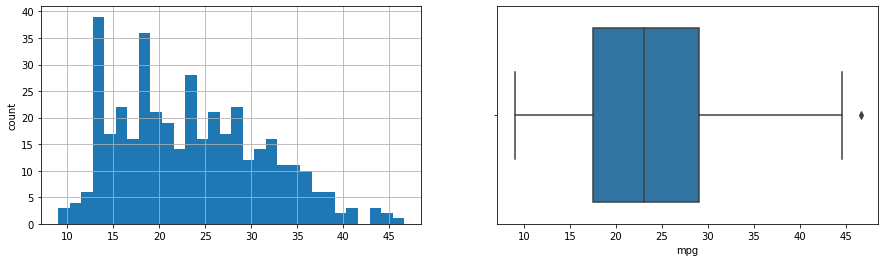

cylinders
Skew : 0.53


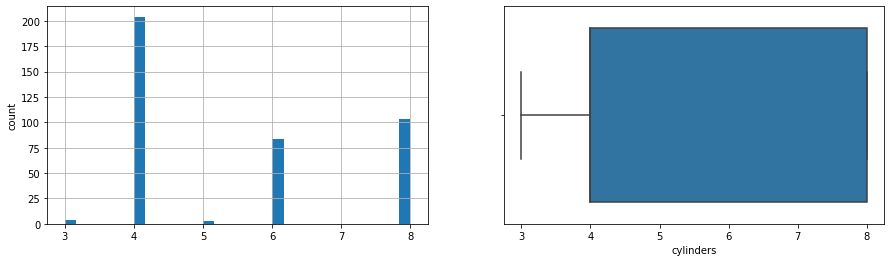

displacement
Skew : 0.72


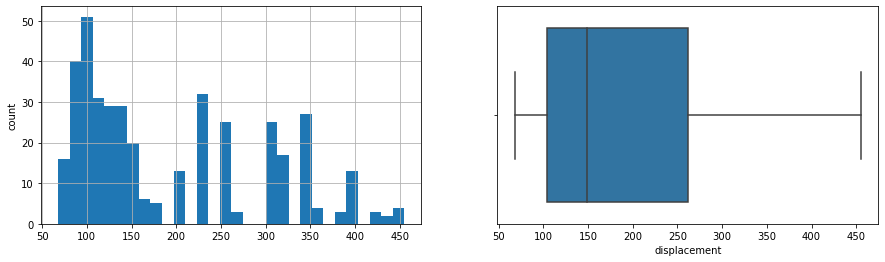

horsepower
Skew : 1.11


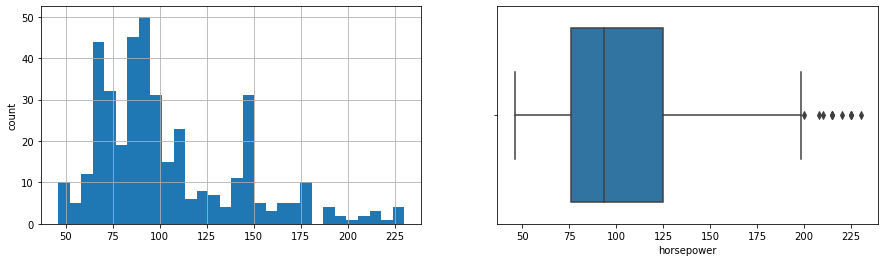

weight
Skew : 0.53


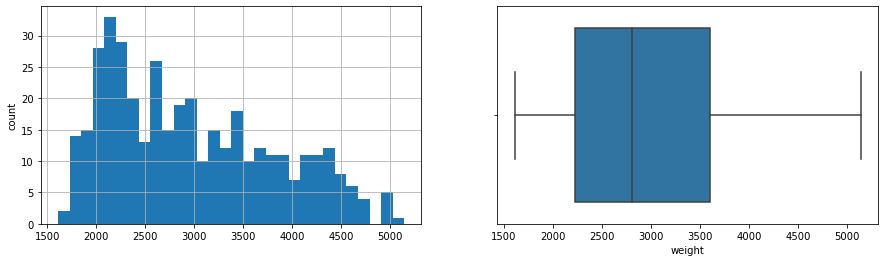

acceleration
Skew : 0.28


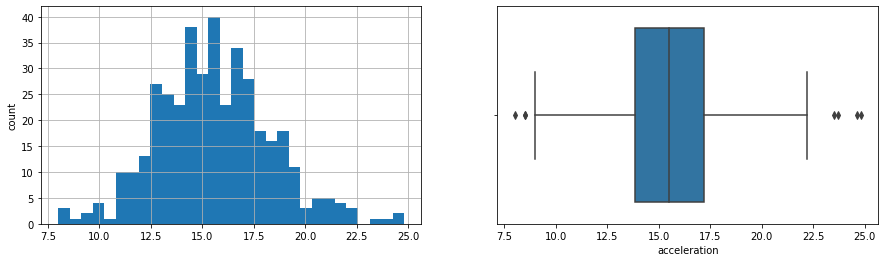

model year
Skew : 0.01


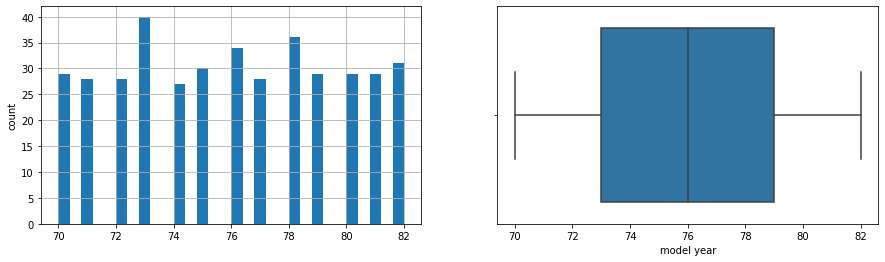

In [ ]:
# Uncomment and complete the code by filling the blanks 

for col in data.columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = data[col])
    plt.show()

**Observations:**
1. mpg - The skewness is 0.46, which is not reaching moderate right-skewed yet. There's a single outlier on the right.
2. cylinders - It's obviously a discrete distribution. There's limited 3-cylinder and 5-cylinder and no 7 cylinder as our knowledge about the car (Only Ford has 3-cylinder. Only Audi has 5-cylinder and no manufacturer has 7-cylinder car.)
3. displacement - The skewness is 0.72, which is moderate right-skewed as observed firstly. No outliers are observed.
4. horsepower - The skewness is 1.1, which is highly right-skewed as observed firstly. There are 7 outliers on the right.
5. weight - The skewness is 0.53, which is moderate right-skewed as observed firstly. No outliers are observed.
6. acceleration - The skewness is 0.28, which is not reaching moderate right-skewed yet. There are 2 and 4 outliers on the left and right sides each.
7. model year - It seems a discrete uniform distribution.**

#### Check correlation

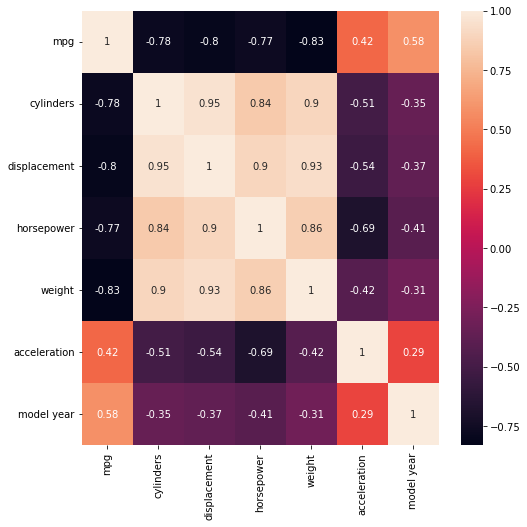

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- The variable mpg has strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders
- model year is positively correlated with mpg.

#### Scale the data

In [ ]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [ ]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

**Apply the PCA algorithm with number of components equal to the total number of columns in the data with random_state=1**

In [ ]:
# Define the number of principal components to generate 
n=data_scaled.shape[1]

# Find principal components for the data
pca = PCA(n_components=n, random_state = 1) #Apply the PCA algorithm with random state = 1
data_pca1 = pd.DataFrame(data = pca.fit_transform(data_scaled)) #Fit and transform the pca function on scaled data

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

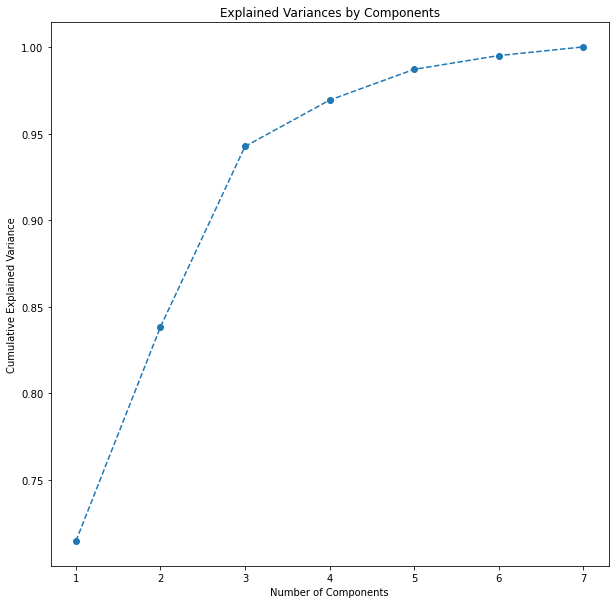

In [ ]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [ ]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  3


**Observations:**
1. From the 7 original features, we reduced the number of features through principal components to 3, these components explain at least 90% of the original variance.
2. That is about a 97% reduction in dimensionality with a loss of 90% in the variance

In [ ]:
pc_comps = ['PC1','PC2','PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


**Interpret the coefficients of three principal components from the below dataframe**

In [ ]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**
1. The first principal component, PC1, is related to the fuel efficiency with  (mpg) in negative relation (-0.4), and the factors of the fuel efficiency (cylinders, displacement, horsepower, and weight) with positive relations (0.41 ~ 0.43). The first principal component seems to capture attributes that generally define the factors to impact the measurement of fuel efficiency, mpg(miles per gallon): The more cylinders, more displacements, more horsepower, and heavier in weight will lead to lower fuel efficiency like mpg.
2. The second principal component, PC2, purely captures a very strong negative relation (-0.91) with the model year, which indicates how new/old the car is, the larger model-year indicates the car is newer.
3. The third principal component, PC3, purely captures a very strong positive relation (0.89) with the acceleration, which indicates the capability of how the car accelerates in the speed.
4. Overall, we utilize the absolute value of 0.4 as a threshold and get three principal components that precisely utilize the linear combination to explain and cover all the attributes in the dataset successfully.**

visualize the data in 2 dimensions using first two principal components 

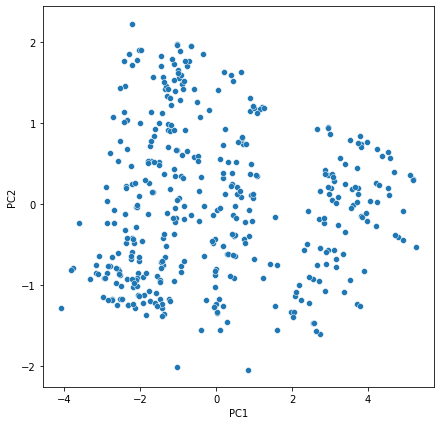

In [ ]:
plt.figure(figsize = (7,7))
sns.scatterplot(x=data_pca1[0],y=data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Add hue to the scatter plot**

**Create a scatter plot for first two principal components with hue = 'cylinders'** 

Text(0, 0.5, 'PC2')

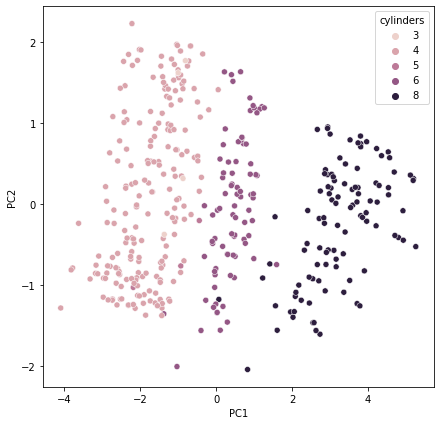

In [ ]:
df_concat = pd.concat([data_pca1, data], axis=1)

plt.figure(figsize = (7,7))

# Create a scatter plot with x=0 and y=1 using df_concat dataframe
sns.scatterplot(x = df_concat[0] , y = df_concat[1], hue = data.cylinders)
plt.xlabel("PC1")
plt.ylabel("PC2")

<AxesSubplot:xlabel='0', ylabel='1'>

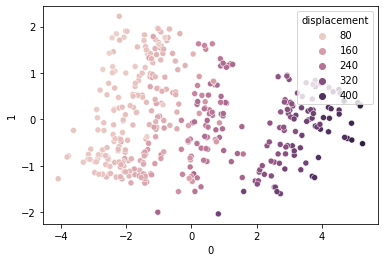

In [ ]:
sns.scatterplot(x = df_concat[0] , y = df_concat[1], hue = data.displacement)

<AxesSubplot:xlabel='0', ylabel='1'>

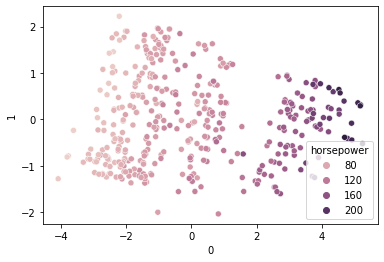

In [ ]:
sns.scatterplot(x = df_concat[0] , y = df_concat[1], hue = data.horsepower)

<AxesSubplot:xlabel='0', ylabel='1'>

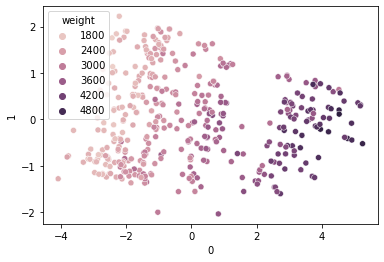

In [ ]:
sns.scatterplot(x = df_concat[0] , y = df_concat[1], hue = data.weight)

<AxesSubplot:xlabel='0', ylabel='1'>

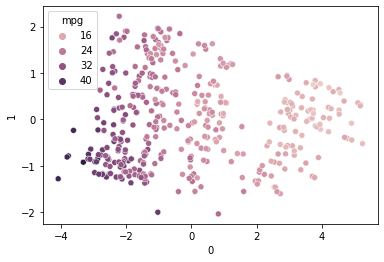

In [ ]:
sns.scatterplot(x = df_concat[0] , y = df_concat[1], hue = data.mpg)

<AxesSubplot:xlabel='0', ylabel='1'>

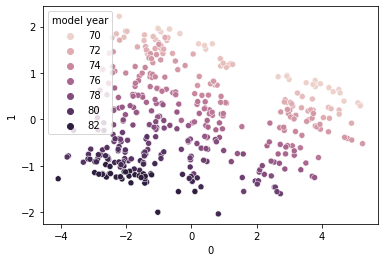

In [ ]:
sns.scatterplot(x = df_concat[0] , y = df_concat[1], hue = data['model year'])

**Observations:**
1. Cylinder - It's a key attribute of the PC1 which has a 0.41 relation.
2. Pattern - While cylinder increases (from 3, 4, all the way to 8), the different subgroups of cylinders steadily move from the left (smaller in PC1) to the right (larger in PC1). All of them follow the same positive-slope scattered pattern.
3. Comparison with other PC1 positive-relation attributes - While we continuously replace cylinders with other attributes. The "displacement", "horsepower" and the "weight" show exactly the same pattern with cylinders' pattern on the scatter plot.
4. Comparison with other PC1 negative-relation attribute - while mpg increases (from 16, 24 all the way to 40), the different subgroups of mpg steadily move from the right (larger in PC1) to the left (smaller in PC1), since it's negatively related to the PC1.
5. Comparison with another PC2 negative-relation attribute - while model year increases (from 70, 72 all the way to 82), the different subgroups of model year steadily move from the top (larger in PC2) to the bottom (smaller in PC2), since it's negatively related to the PC2.
6. Overall about hue - The hue of the specific key attribute between the first two principal components like cylinders provides us a further understanding of the subgroup behavior along the scatter pattern. It's very significant and helpful in the data analysis and visualization, specifically with the example of this PCA approach.**

## t-SNE

 **Apply the TSNE embedding with 2 components for the dataframe data_scaled (use random_state=1)**

In [ ]:
# Apply the TSNE algorithm with random state = 1
tsne = TSNE(n_components=2, random_state=1)  

# Fit and transform tsne function on the scaled data
data_tsne = tsne.fit_transform(data_scaled) 

In [ ]:
data_tsne.shape

(398, 2)

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne.head()

,Component 1,Component 2
0,-38.088413,-15.912958
1,-37.404369,-17.995850
2,-38.050472,-17.063194
3,-37.718334,-16.476006
4,-38.404663,-16.763493


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

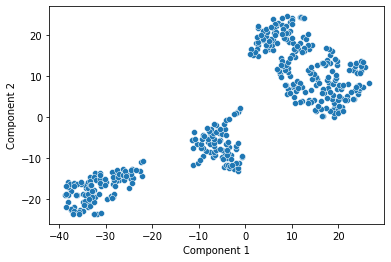

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

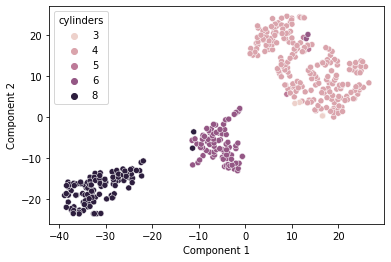

In [ ]:
# See scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data.cylinders)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

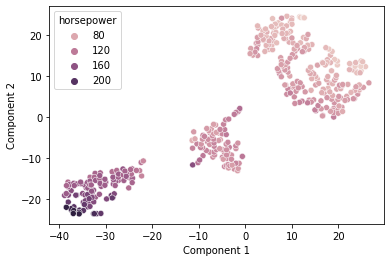

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data.horsepower)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

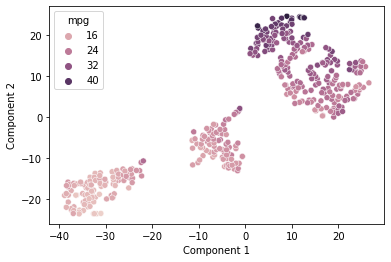

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data.mpg)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

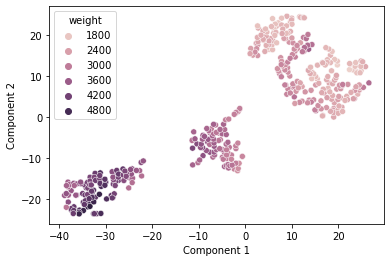

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data.weight)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

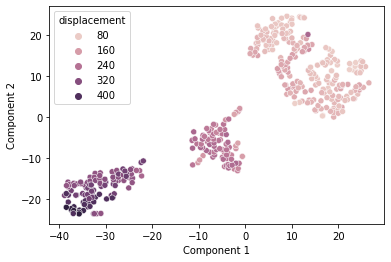

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data.displacement)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

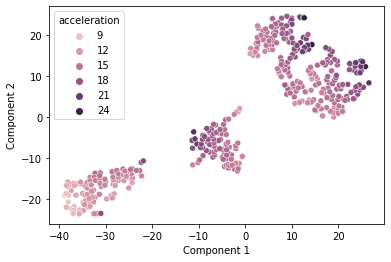

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data.acceleration)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

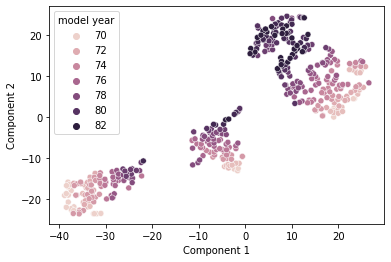

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1], hue=data['model year'])

**Observations:**
1. Two components - With tSNE's dimension reduction to only two components, this scatter plot offers a clearly amazing three clusters on the plot as a positive relationship between component 1 and component 2. 
2. Visualization with hue - With hue option, we could easily to see the success - almost in three distinctive subgouprs wih the hue effects.
3. Cylinder - It's obviously the smartest choice to hue with cylinders. It's almost perfectly in seperate groups without overlap. From the box plot comparison, we could see the cylinders offer the best option to decisvely seperate the data in three groups to analyze.
4. In Comparison to other attributes in the scatter plot, the choice of cylinder is the best option since it offers a clear three culsters without any doubt.**

In [ ]:
# Assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component> 0) and (second_component >0): 
        return 'group_1'
    if (first_component >-20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [ ]:
data_tsne['groups'] = data_tsne.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

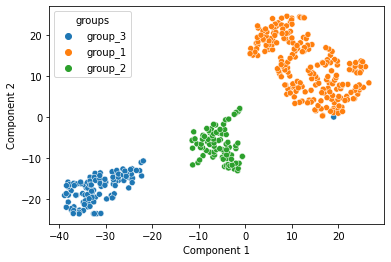

In [ ]:
sns.scatterplot(x=data_tsne.iloc[:,0],y=data_tsne.iloc[:,1],hue=data_tsne.iloc[:,2])

In [ ]:
data['groups'] = data_tsne['groups'] 

 **Complete the following code by filling the blanks**

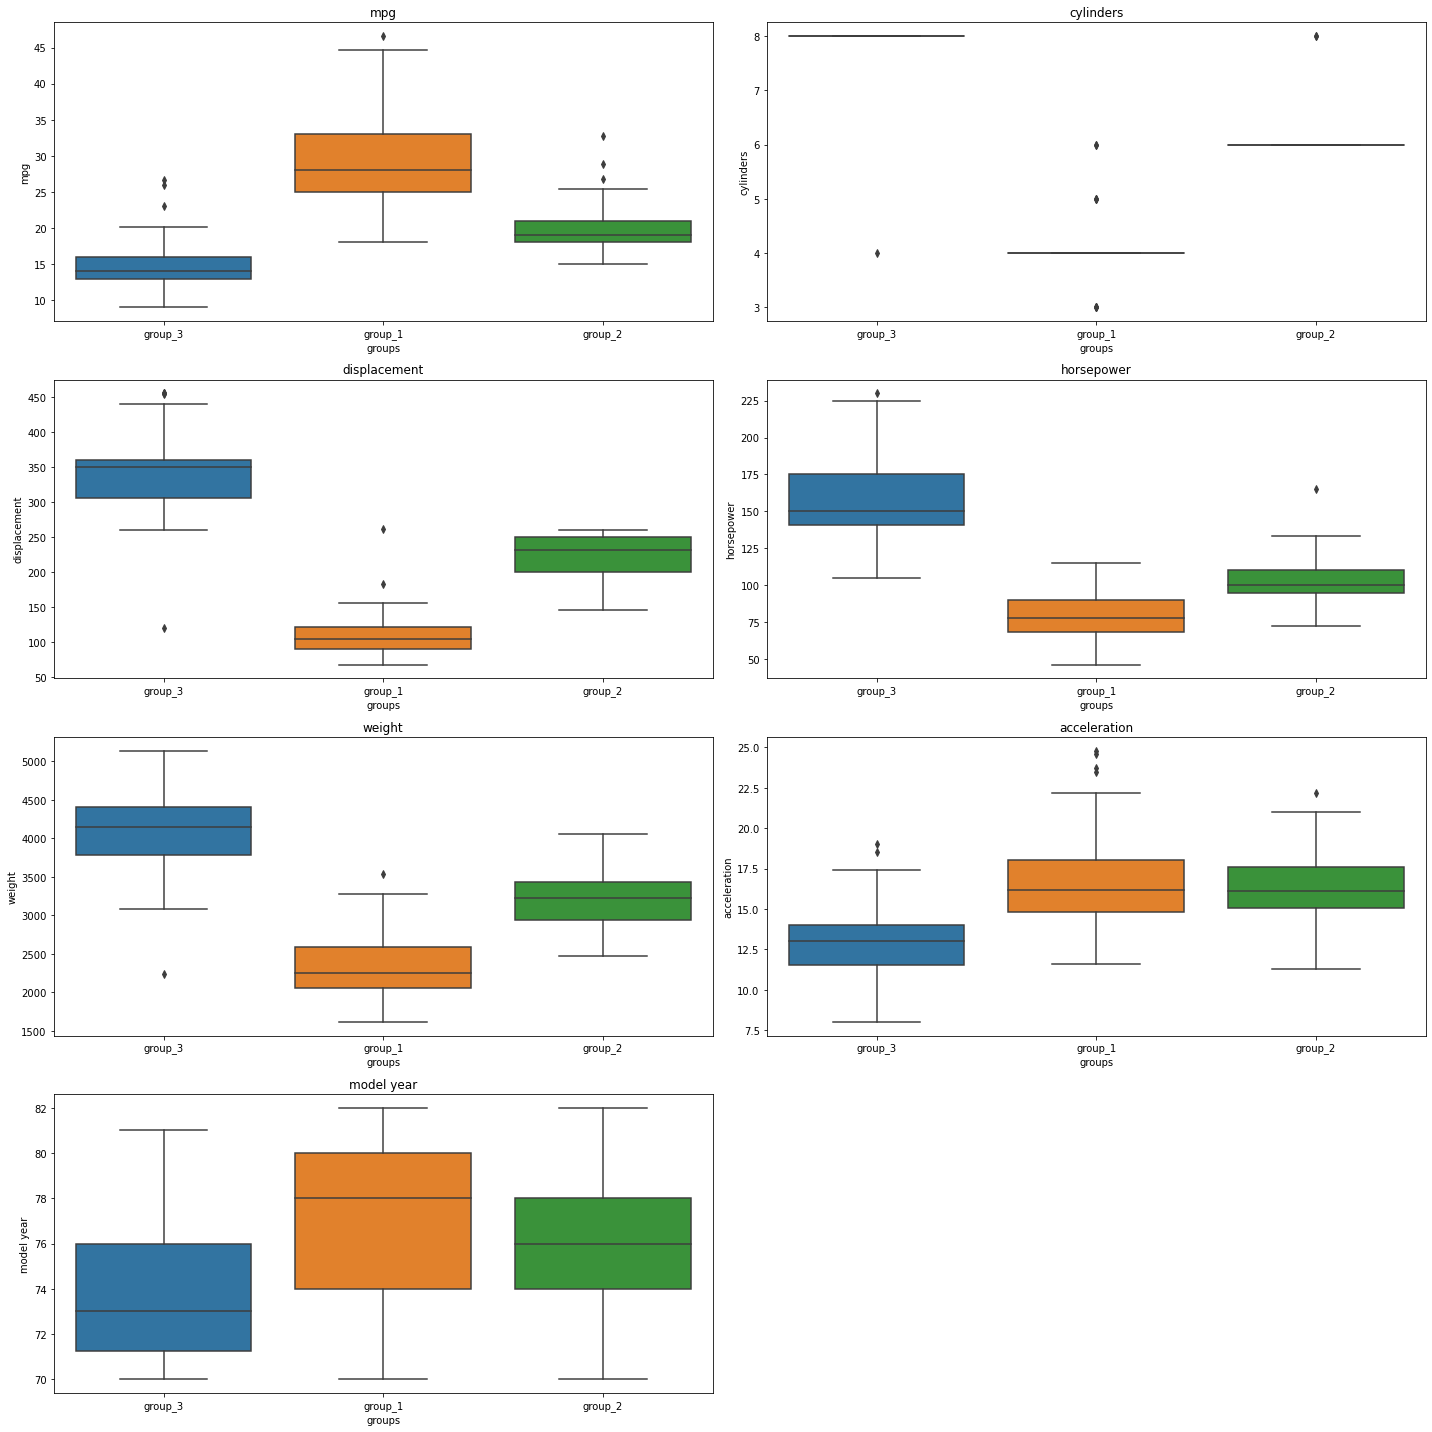

In [ ]:
all_col = data.columns.tolist()
plt.figure(figsize=(20, 20))

for i, variable in enumerate(all_col):
    if i==7:
        break
    plt.subplot(4, 2, i + 1)
    #Create boxplot with groups on the x-axis and variable on the y-axis (use the dataframe data)
    sns.boxplot(x = data ['groups'], y = data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**
1. There are three groups in the data. Each group has a different set of characteristics.

2. Group 1 represents basically all 4-cylinder cars whatever the makes and models of the car except 3 outliers. Among the three groups, group 1 is the lightest in weight, the smallest in engine displacement, the weakest in horsepower, but a clear winner since it's economically the best efficiency in the measurement of mpg, the longest miles per gallon the car run. It matches the intuition that it's really the payoff between power and fuel efficiency. It's no doubt group 1 would be a considerable group of cars which meets the demand of environmental awakeness and economic consideration.

3. Group 2 represents basically all 6-cylinder cars whatever the makes and models of the car unless except 1 outlier. Among the three groups, group 2 actually lies far from the two sides of the spectrum: the weight, displacement, horsepower, acceleration, model year even mpg are all not the highest or the lowest. It seems group 2 cars are a safe choice to comprehensively cover all the factors in an appropriate balance.

4. Group 3 represents basically all 8-cylinder cars whatever the makes and models of the car unless except 1 outlier. Among the three groups, group 3 is the heaviest in weight, the largest in engine displacement, the strongest in horsepower, but struggles the most in acceleration. It also economically with the worst efficiency in the measurement of mpg, the shortest miles per gallon the car run. This group reflects another demand for the car with power.

5. Overall, the tSNE approach offers a successful analysis of the reduction of dimension, specifically in the smaller target like this 398-entry dataset. **